In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [67]:
df = pd.read_csv('C:/Users/haris/train_Df64byy.csv')
test_df = pd.read_csv('C:/Users/haris/test_YCcRUnU.csv')
combined = [df, test_df]

In [68]:
df.rename({'Health Indicator':'Health_Indicator'}, axis =1, inplace = True)
test_df.rename({'Health Indicator':'Health_Indicator'}, axis = 1, inplace = True)
df.Health_Indicator.value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health_Indicator, dtype: int64

In [69]:
for dataset in combined:
    dataset['Holding_Policy_Duration'] = dataset['Holding_Policy_Duration'].replace('14+',15)

#df = df.astype({col: 'float16' for col in df.select_dtypes('object').columns})
#test_df = test_df.astype({col: 'float16' for col in test_df.select_dtypes('object').columns})
    

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health_Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB


# Distribution of Numerical Features
Response is a categorical feature with 0 or 1 values


In [71]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


# Distribution of Categorical Features
1. City_Code has 36 unique values, with 17.6% C1
2. Accomodation_type has 2 values, with 54.9% Owned
3. Reco_Insurance_Type has 2 possible values, with 79.6% Individual (40536/50882)
4. Is_Spouse has 2 possible values, with 83.4% No
5. Health Indicator has 9 possible values, with 33.1% X1
6. Holding_Policy_duration has 15 possible values with 14.6% of 1 year duration


In [72]:
df.describe(include=['O'])

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health_Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


In [73]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health_Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [74]:
df.Reco_Insurance_Type.value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [75]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health_Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [76]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


# Data Analysis
Hypothesis: 
1. Customers married to each other show interest in recommended policy
2. Customers with own house show interest in recommended policy
3. Customers with Joint insurance show interest in recommended policy
4. Customers with certain health condition show interest in recommended policy
5. Customers with certain recommended policy category show interest in recommended policy
6. Customers in certain age range show interest in recommended policy
7. Customers who are recommended certain annual premium show interest in recommended policy
8. Customers in certain region/city show interest in recommended policy

# Analyze by pivoting features


In [77]:
df[['Is_Spouse','Response']].groupby(['Is_Spouse'],as_index=False).mean().sort_values(by='Response',ascending=False)

,Is_Spouse,Response
1,Yes,0.243648
0,No,0.239213


In [78]:
df[['Accomodation_Type','Response']].groupby('Accomodation_Type',as_index=False).mean().sort_values(by='Response',ascending=False)

,Accomodation_Type,Response
0,Owned,0.241959
1,Rented,0.237495


In [79]:
df[['Reco_Insurance_Type','Response']].groupby('Reco_Insurance_Type',as_index=False).mean().sort_values(by='Response',ascending=False)

,Reco_Insurance_Type,Response
1,Joint,0.248309
0,Individual,0.237813


In [80]:
df[['City_Code','Response']].groupby('City_Code',as_index=False).mean().sort_values(by='Response',ascending=False)

,City_Code,Response
23,C30,0.310345
25,C32,0.287500
28,C35,0.285714
27,C34,0.276923
15,C23,0.265758
19,C27,0.257627
4,C13,0.253731
33,C7,0.253403
26,C33,0.248252
0,C1,0.246072


# count the number of people with spouse who have taken insurance

In [81]:
df.Is_Spouse[df.Response==1].value_counts()

No     10157
Yes     2052
Name: Is_Spouse, dtype: int64

# Count the number of people with rent or own house who have taken insurance

In [82]:
df.Accomodation_Type[df.Response==1].value_counts()

Owned     6763
Rented    5446
Name: Accomodation_Type, dtype: int64

# Analyze by visualizing Data

Text(0.5, 1.0, 'Count of number of people with spouse who have taken insurance')

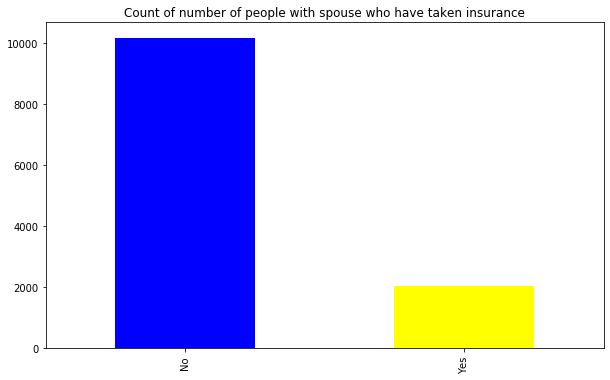

In [83]:
df.Is_Spouse[df.Response==1].value_counts().plot(kind='bar', figsize=(10,6), color = ['blue','yellow'])
plt.title("Count of number of people with spouse who have taken insurance")

Text(0.5, 1.0, 'Count of people who have taken insurance based on accomodation type')

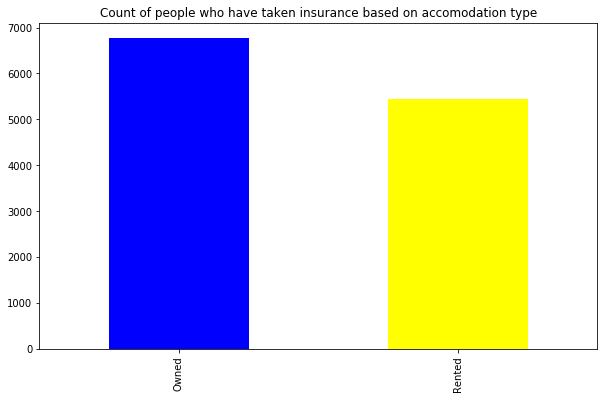

In [84]:
df.Accomodation_Type[df.Response==1].value_counts().plot(kind='bar',figsize=(10,6),color = ["blue","yellow"])
plt.title("Count of people who have taken insurance based on accomodation type")

In [85]:
df.Reco_Insurance_Type[df.Response==1].value_counts()

Individual    9640
Joint         2569
Name: Reco_Insurance_Type, dtype: int64

# count of people who have taken insurance based on Reco_Insurance_Type

Text(0.5, 1.0, 'People who have taken insurance based on Reco_Insurance_Type')

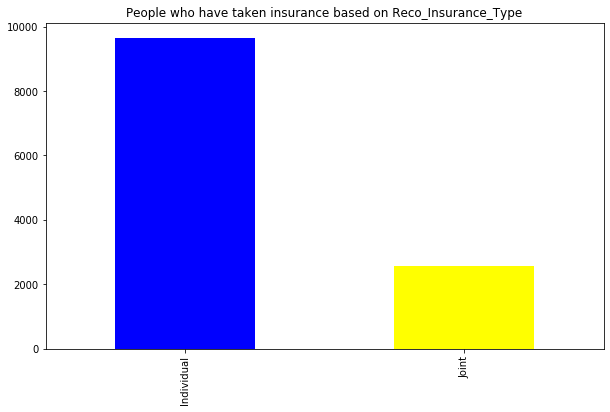

In [86]:
df.Reco_Insurance_Type[df.Response==1].value_counts().plot(kind='bar',figsize=(10,6),color=['blue','yellow'])
plt.title("People who have taken insurance based on Reco_Insurance_Type")

# Correlating Numerical features and Target Variable

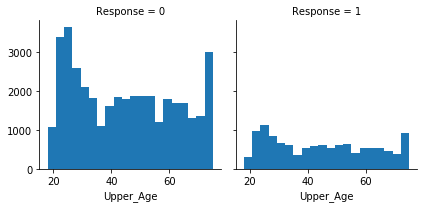

In [23]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Upper_Age', bins=20)

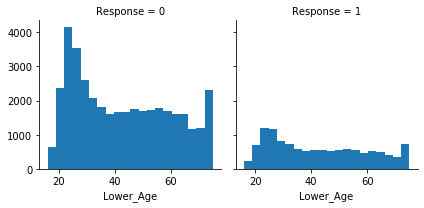

In [24]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Lower_Age',bins=20)

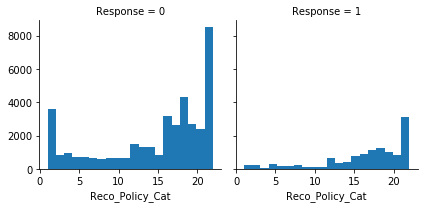

In [25]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Reco_Policy_Cat',bins=20)

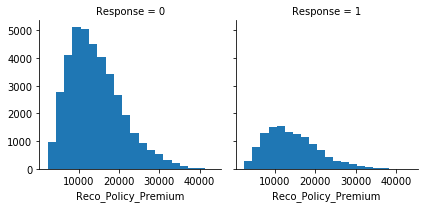

In [26]:
g = sns.FacetGrid(df,col='Response')
g.map(plt.hist,'Reco_Policy_Premium',bins=20)

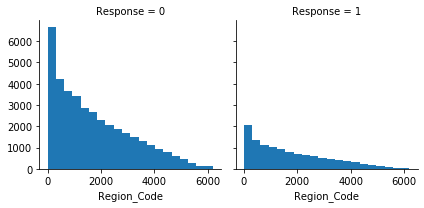

In [27]:
g = sns.FacetGrid(df, col = 'Response')
g.map(plt.hist,'Region_Code',bins= 20)

In [28]:
df.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.006649,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.006649,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


In [87]:
df = df.astype({'Accomodation_Type':int,'Is_Spouse':int,'Health_Indicator':int,'Reco_Insurance_Type':int,'Holding_Policy_Type':int})
df.dtypes

ValueError: invalid literal for int() with base 10: 'Rented'

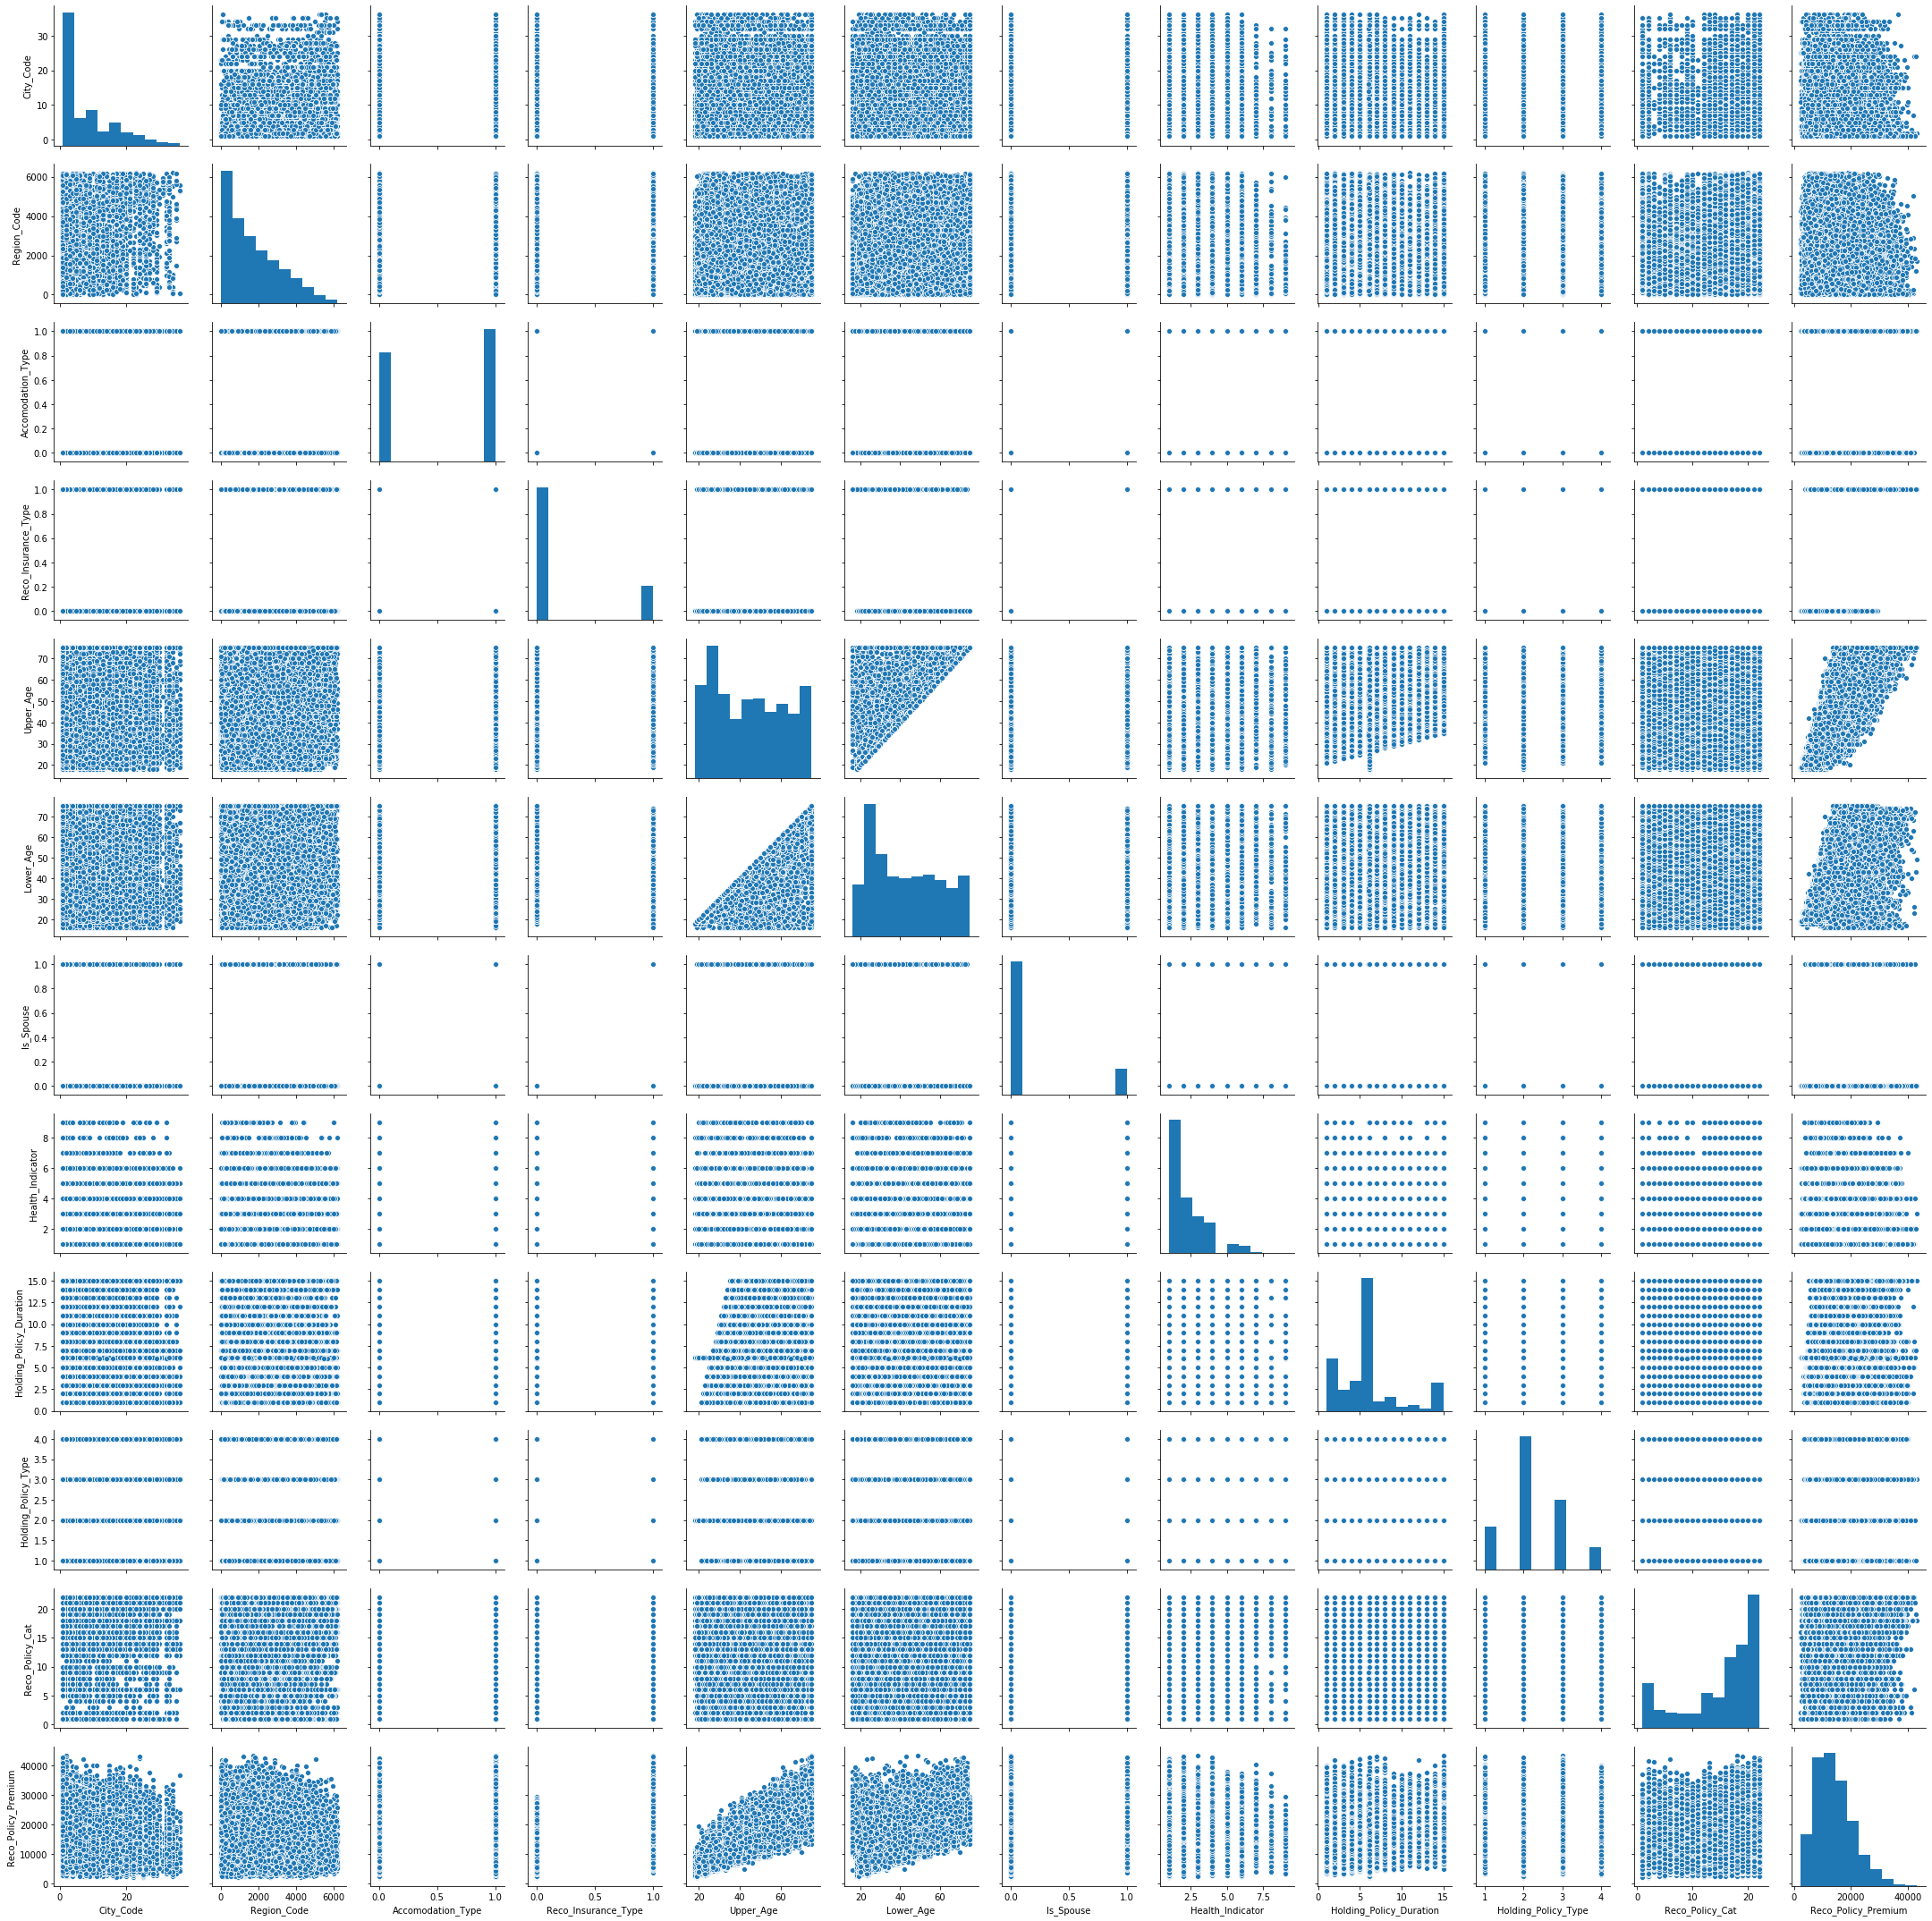

In [65]:
sns.pairplot(df)

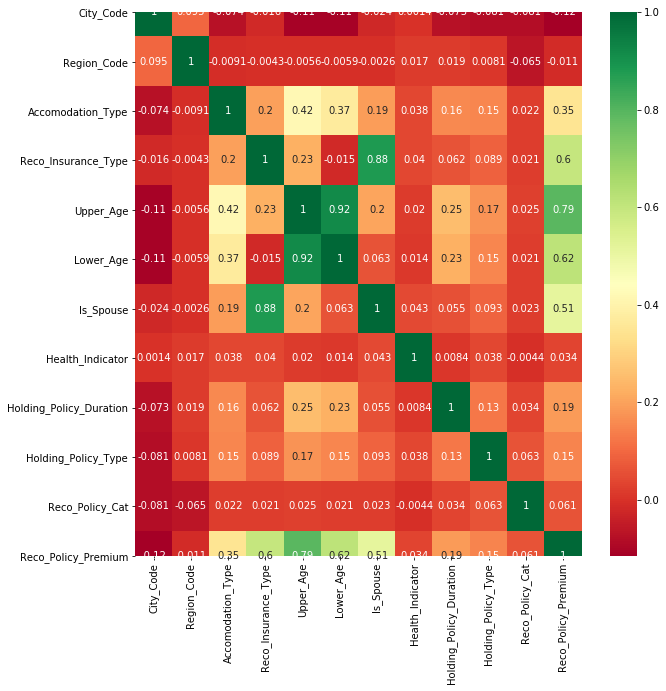

In [66]:
cor_matr = df.corr()
top_cor_feat = cor_matr.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_cor_feat].corr(),annot=True,cmap="RdYlGn")


# Feature Engineering
Convert categorical to ordinal/boolean:
1. City_Code
2. Accomodation_Type
3. Reco_Insurance_Type
4. Is_Spouse
4. Health_Indicator


# Feature Engineering
    These features need correcting: 
    1. Holding_Policy_Duration: need to represent 14+, may be as 15
    2. Health Indicator needs to be renamed to remove the space, can be filled with most occuring value
    3. Holding_Policy_Type, Health Indicator, Holding_Policy_Duration contain number of null values in training and test set
    4. Id column needs to be dropped
    5. Upper_age is highly correlated to Lower_Age, one of them can be dropped
    6. Holding_Policy_Type and Holding_Policy_Duration are Incomplete, have 33.4% of null values and can be dropped

# Convert Categorical to Ordinal

In [88]:
Indicator_mapping = {"X1":1,"X2":2,"X3":3,"X4":4,"X5":5,"X6":6,"X7":7,"X8":8,"X9":9}
df['Health_Indicator'] = df['Health_Indicator'].map(Indicator_mapping)
df.head()
#for dataset in combined:
 #   dataset['Health_Indicator'] = dataset['Health_Indicator'].map(Indicator_mapping)
    #dataset['Health_Indicator'] = dataset['Health_Indicator'].fillna(0)



,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,1.0,15,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,2.0,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,1.0,15,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,2.0,3.0,1.0,16,10404.0,0


In [89]:
freq_Indicator = df.Health_Indicator.dropna().mode()[0]
freq_Indicator

1.0

In [90]:
#for dataset in combined:
df['Health_Indicator'] = df['Health_Indicator'].fillna(freq_Indicator)

In [91]:
test_df['Health_Indicator'] = test_df['Health_Indicator'].map(Indicator_mapping)
freq_Indicator = test_df.Health_Indicator.dropna().mode()[0]
test_df['Health_Indicator'] = test_df['Health_Indicator'].fillna(freq_Indicator)

In [92]:
df = df.astype({'Holding_Policy_Duration':float})
test_df = test_df.astype({'Holding_Policy_Duration':float})
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health_Indicator           float64
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [93]:
mean_fill = df.Holding_Policy_Duration.mean()
#df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].apply(lambda x: mean_fill if x == 'NaN' else x)
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(mean_fill)
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,1.0,15.000000,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,2.0,6.156769,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,1.0,1.000000,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,1.0,15.000000,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,2.0,3.000000,1.0,16,10404.0,0


In [94]:
mean_fill = test_df.Holding_Policy_Duration.mean()
#df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].apply(lambda x: mean_fill if x == 'NaN' else x)
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].fillna(mean_fill)

In [95]:
mean_fill = df.Holding_Policy_Type.mean()
#df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].apply(lambda x: mean_fill if x == 'NaN' else x)
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(mean_fill)
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,1.0,15.000000,3.000000,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,2.0,6.156769,2.439228,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,1.0,1.000000,1.000000,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,1.0,15.000000,3.000000,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,2.0,3.000000,1.000000,16,10404.0,0


In [96]:
mean_fill = test_df.Holding_Policy_Type.mean()
#df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].apply(lambda x: mean_fill if x == 'NaN' else x)
test_df['Holding_Policy_Type'] = test_df['Holding_Policy_Type'].fillna(mean_fill)
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,1.0,6.000000,3.000000,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,1.0,3.000000,3.000000,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,3.0,2.000000,4.000000,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,3.0,3.000000,3.000000,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,3.0,6.193834,2.440085,5,22534.0


In [97]:
Accomodation_mapping = {"Rented":0,"Owned":1}
#for dataset in combined:
df['Accomodation_Type'] = df['Accomodation_Type'].map(Accomodation_mapping)
test_df['Accomodation_Type'] = test_df['Accomodation_Type'].map(Accomodation_mapping)
    


In [98]:
RecoType_mapping = {'Individual':0,'Joint':1}
#for dataset in combined:
df['Reco_Insurance_Type'] = df['Reco_Insurance_Type'].map(RecoType_mapping)
test_df['Reco_Insurance_Type'] = test_df['Reco_Insurance_Type'].map(RecoType_mapping)


In [99]:
Spouse_mapping = {'No':0,'Yes':1}
#for dataset in combined:
df['Is_Spouse'] = df['Is_Spouse'].map(Spouse_mapping)
test_df['Is_Spouse'] = test_df['Is_Spouse'].map(Spouse_mapping)



In [100]:
City_mapping = {'C1':1,'C2':2,'C3':3,'C4':4,'C5':5,'C6':6,'C7':7,'C8':8,'C9':9,'C10':10,'C11':11,'C12':12,'C13':13,'C14':14,'C15':15,
                'C16':16,'C17':17,'C18':18,'C19':19,'C20':20,'C21':21,'C22':22,'C23':23,'C24':24,'C25':25,'C26':26,'C27':27,'C28':28,
                'C29':29,'C30':30,'C31':31,'C32':32,'C33':33,'C34':34,'C35':35,'C36':36}
df['City_Code'] = df['City_Code'].map(City_mapping)
test_df['City_Code'] = test_df['City_Code'].map(City_mapping)
#for dataset in combined:
#    dataset['City_Code'] = dataset['City_Code'].map(City_mapping)



In [101]:
Y = df.Response
ID = test_df.ID
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,3213,0,0,36,36,0,1.0,15.000000,3.000000,22,11628.0,0
1,2,5,1117,1,1,75,22,0,2.0,6.156769,2.439228,22,30510.0,0
2,3,5,3732,1,0,32,32,0,1.0,1.000000,1.000000,19,7450.0,1
3,4,24,4378,1,1,52,48,0,1.0,15.000000,3.000000,19,17780.0,0
4,5,8,2190,0,0,44,44,0,2.0,3.000000,1.000000,16,10404.0,0


# Feature Importance

In [102]:
df_feat = df.astype({'Accomodation_Type':object,'Is_Spouse':object,'Health_Indicator':object,'Reco_Insurance_Type':object,'Holding_Policy_Type':object})
df_feat.dtypes

ID                           int64
City_Code                    int64
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health_Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type         object
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [103]:
final_data = pd.get_dummies(df_feat,drop_first=True)
final_data.head()

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_1,...,Health_Indicator_4.0,Health_Indicator_5.0,Health_Indicator_6.0,Health_Indicator_7.0,Health_Indicator_8.0,Health_Indicator_9.0,Holding_Policy_Type_2.0,Holding_Policy_Type_2.4392282328360158,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0
0,1,3,3213,36,36,15.000000,22,11628.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,5,1117,75,22,6.156769,22,30510.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,5,3732,32,32,1.000000,19,7450.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,24,4378,52,48,15.000000,19,17780.0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5,8,2190,44,44,3.000000,16,10404.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df = df.drop(['ID','Response'],axis=1)
test_df = test_df.drop(['ID'],axis=1)
combined = [df,test_df]
df.shape,test_df.shape

((50882, 12), (21805, 12))

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df,Y)

C:\Users\haris\Anacondas3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [106]:
print(model.feature_importances_)

[0.10658116 0.16364294 0.01724831 0.00362426 0.10801961 0.10836078
 0.0043033  0.07979812 0.07511855 0.05023392 0.12077026 0.16229878]


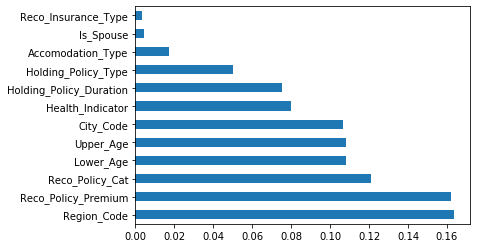

In [107]:
feat_imp = pd.Series(model.feature_importances_, index = df.columns)
feat_imp.nlargest(12).plot(kind='barh')
plt.show()

# Normalizing the Features

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()
feat= ['City_Code','Region_Code','Accomodation_Type','Reco_Insurance_Type','Upper_Age','Lower_Age','Is_Spouse','Health_Indicator','Reco_Policy_Cat','Reco_Policy_Premium','Holding_Policy_Duration','Holding_Policy_Type']
df_normal = scaler.fit_transform(df[feat])
df_normal = pd.DataFrame(df_normal, columns = feat)
#df_normal['Response'] = df['Response']
df_normal.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration,Holding_Policy_Type
0,0.057143,0.518650,0.0,0.0,0.315789,0.338983,0.0,0.000,1.000000,0.227609,1.000000,0.666667
1,0.114286,0.180203,1.0,1.0,1.000000,0.101695,0.0,0.125,1.000000,0.687356,0.368341,0.479743
2,0.114286,0.602454,1.0,0.0,0.245614,0.271186,0.0,0.000,0.857143,0.125881,0.000000,0.000000
3,0.657143,0.706766,1.0,1.0,0.596491,0.542373,0.0,0.000,0.857143,0.377401,1.000000,0.666667
4,0.200000,0.353464,0.0,0.0,0.456140,0.474576,0.0,0.125,0.714286,0.197807,0.142857,0.000000


In [110]:
test_df_normal = scaler.fit_transform(test_df[feat])
test_df_normal = pd.DataFrame(test_df_normal, columns = feat)
#df_normal['Response'] = df['Response']
test_df_normal.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration,Holding_Policy_Type
0,0.000000,0.025065,1.0,0.0,0.210526,0.237288,0.0,0.00,0.190476,0.235009,0.357143,0.666667
1,0.085714,0.000970,1.0,1.0,0.894737,0.881356,1.0,0.00,0.809524,0.722007,0.142857,0.666667
2,0.000000,0.091041,0.0,0.0,0.175439,0.203390,0.0,0.25,0.761905,0.170286,0.071429,1.000000
3,0.057143,0.190168,0.0,0.0,0.087719,0.118644,0.0,0.25,0.809524,0.166587,0.142857,0.666667
4,0.000000,0.153622,1.0,0.0,1.000000,1.000000,0.0,0.25,0.190476,0.489669,0.370988,0.480028


C:\Users\haris\Anacondas3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


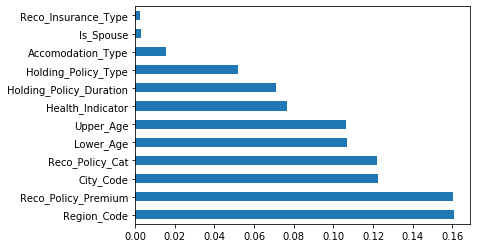

In [111]:
model = ExtraTreesClassifier()
model.fit(df_normal,Y)
feat_imp = pd.Series(model.feature_importances_, index = df_normal.columns)
feat_imp.nlargest(12).plot(kind='barh')
plt.show()

# Model Predict Solve

In [112]:
#X = df.drop("Response",axis=1)
X = df_normal.drop(['Reco_Insurance_Type','Holding_Policy_Duration','Lower_Age','Is_Spouse'],axis=1)
#Y = df.Response

In [113]:
Y_tr = test_df_normal.drop(['Reco_Insurance_Type','Holding_Policy_Duration','Lower_Age','Is_Spouse'],axis=1)

In [114]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)
X_train = X
Y_train = Y
X_test = Y_tr

In [115]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
def evaluate_score(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred)
    rcl = recall_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    metrics = {'accuracy':round(acc,3),
              'recall':round(rcl,3),
              'precision':round(prec,3),
              'f1_score':round(f1,3),
              'roc_auc':round(auc,3)}
    return print(metrics)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
knn_acc = round(knn.score(X_train, Y_train)*100,2)
knn_acc
#evaluate_score(Y_test,knn_pred)

82.47

In [60]:
#from mlxtend.evaluate import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix

#cm = confusion_matrix(y_target = Y_test, y_predicted = knn_pred, binary =False)
#fig, ax = plot_confusion_matrix(conf_mat=cm)
#plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)
#evaluate_score(Y_test,lr_pred)
acc_log = round(lr.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\haris\Anacondas3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


76.01

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
#evaluate_score(Y_test,rf_pred)
rf.score(X_train,Y_train)
acc_rf = round(rf.score(X_train,Y_train)*100,2)
acc_rf

96.56

In [118]:
Resp_ID = ID
submission_df_1 = pd.DataFrame({
                  "ID": Resp_ID, 
                  "Response": rf_pred})

In [119]:
submission_df_1.to_csv("C:/Users/haris/submission.csv")